# Linear Regression in R (SLR & MLR) 

### Scenario <br>

<p>"Burger Slim" network wants to launch a new kids meal. They want to predict how different meal combinations affect revenue in each of their 2000 branches via linear regression. </p>

The features they chose for the modal are: <br>

<img src="Burger_Slim.png"> <br>

Lets get to it!

In [1]:
myData = read.csv("Burgers2000.csv")
head(myData)

price,size_beverage,salad,ice_cream,toy,revenue
3.546357,0.6,1,0,1,34957.86
4.179821,0.7,0,0,1,50046.82
3.634045,0.6,0,0,0,41464.24
4.166024,0.7,1,1,0,43034.24
4.139435,0.7,1,0,0,34856.40
3.648140,0.6,0,0,0,48116.88


In [2]:
# Validating the data set prior to fitting  is very importent!
any(is.na(myData))

[1] FALSE

Ok, Let's take a look at our data and <i>see</i> if we can spot any corelations right off the start. 

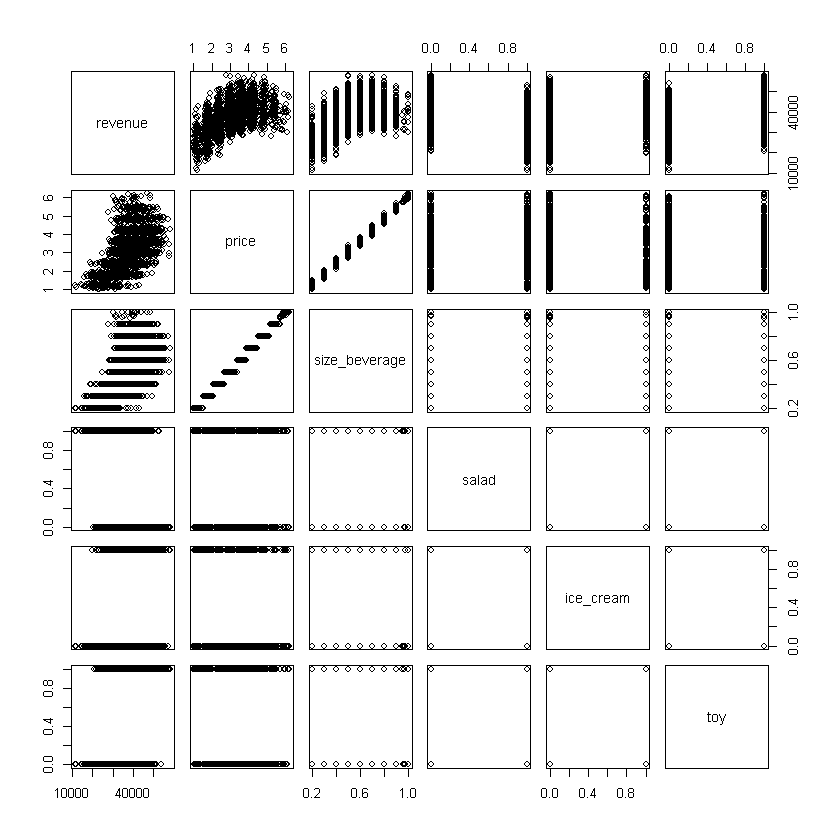

In [3]:
pairs(revenue~., data=myData)

Considering that this is still data science, let's get the corelations in numbers.

In [4]:
# Corelation of revenue and price.
cor(myData$revenue, myData$price)

[1] 0.55747

In [5]:
# Corelation of revenue and size_beverage.
cor(myData$revenue, myData$size_beverage)

[1] 0.5606183

In [6]:
# Corelation of revenue and salad.
cor(myData$revenue, myData$salad)

[1] -0.4755427

In [7]:
# Corelation of revenue and ice_cream.
cor(myData$revenue, myData$ice_cream)

[1] 0.1993739

In [8]:
# Corelation of revenue and toy.
cor(myData$revenue, myData$toy)

[1] 0.3939763

<p>We can easly see that there is positive linear corelation between revenue and price/size_beverage. Also a negative linear corelation between revenue and salad. Although, note that the corelations aren't that strong.</p>

This pretty much makes sense, as kids like more quantity in thier bevarage and toys (thus making the meal cost more), alongside having a dislike to vegitables.

### Splitting the Data (train & test)<br>

Ok, so up until now we really just kind of did a quick review of at the data. It's time to dig a little deeper in order to get much more accurate and reliable conclusions. <br>

First off, we will split our data into a training & testing sets (70/30) in order to avoid over fitting.

In [9]:
# In order to get persistant results amongst peers.
set.seed(1234)
# Assigning random partition (70/30) values to our data set
myData$sampling = runif(nrow(myData)) 

head(myData)

price,size_beverage,salad,ice_cream,toy,revenue,sampling
3.546357,0.6,1,0,1,34957.86,0.1137034
4.179821,0.7,0,0,1,50046.82,0.6222994
3.634045,0.6,0,0,0,41464.24,0.6092747
4.166024,0.7,1,1,0,43034.24,0.6233794
4.139435,0.7,1,0,0,34856.40,0.8609154
3.648140,0.6,0,0,0,48116.88,0.6403106


In [10]:
# Splitting the data set into train and test sets (then removing the sample columns)
testSet = subset(myData, myData$sampling <= 0.3)
testSet = testSet[, !names(testSet) %in% c("sampling")]

trainSet = subset(myData, myData$sampling > 0.3)
trainSet = trainSet[, !names(trainSet) %in% c("sampling")]

### Simple Linear Regression (SLR)<br>

Alright, everything from validating to splitting our data is set! We're ready to fit the sets into the first model we're looking at (SLR). <br>

SLR means that we want to explain our dependent variable via a single independent variable. In our case this means we want to see how one of our features, now price, predicts revenue. <br>

This is done through the simple linear equation we all learned in high school, <b>Y=m&#8727;X+b</b>. Where <b>Y</b> is revenue, <b>X</b> is price, <b>m</b> is the <i>average</i> increase we get in every increament of x and <b>b</b> is the intercept with the y axis.   

In [11]:
# Fitting our data into the SLR model.
fit1 = lm(revenue~price, data=trainSet)
# Retrieving the coefficiency of our model.
coef(fit1)
# Description of our model.
summary(fit1)

(Intercept)       price 
  25331.416    3927.575


Call:
lm(formula = revenue ~ price, data = trainSet)

Residuals:
     Min       1Q   Median       3Q      Max 
-19119.9  -4604.5   -177.3   4335.9  21377.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  25331.4      508.5   49.82   <2e-16 ***
price         3927.6      154.9   25.35   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6495 on 1393 degrees of freedom
Multiple R-squared:  0.3157,	Adjusted R-squared:  0.3152 
F-statistic: 642.6 on 1 and 1393 DF,  p-value: < 2.2e-16


Let's take a look at what we got here.

By the values showen above we get that our equation is as follows, <i><b>revenue</b> = 3927.57469787566&#8727;<b>price</b> + 25331.415596012.</i>
But what does this mean? Well, our itercept is positive and means that each value of X will get an adjusment of + 25331.415596012 <b>(note: if X cannot be zero like in our case, the intercept is meaningless)</b>. Also, our <i>slope</i>(m) is 3927.57469787566. This means that for every increase in price we get an increase of 3927.57469787566 to the revenue. 

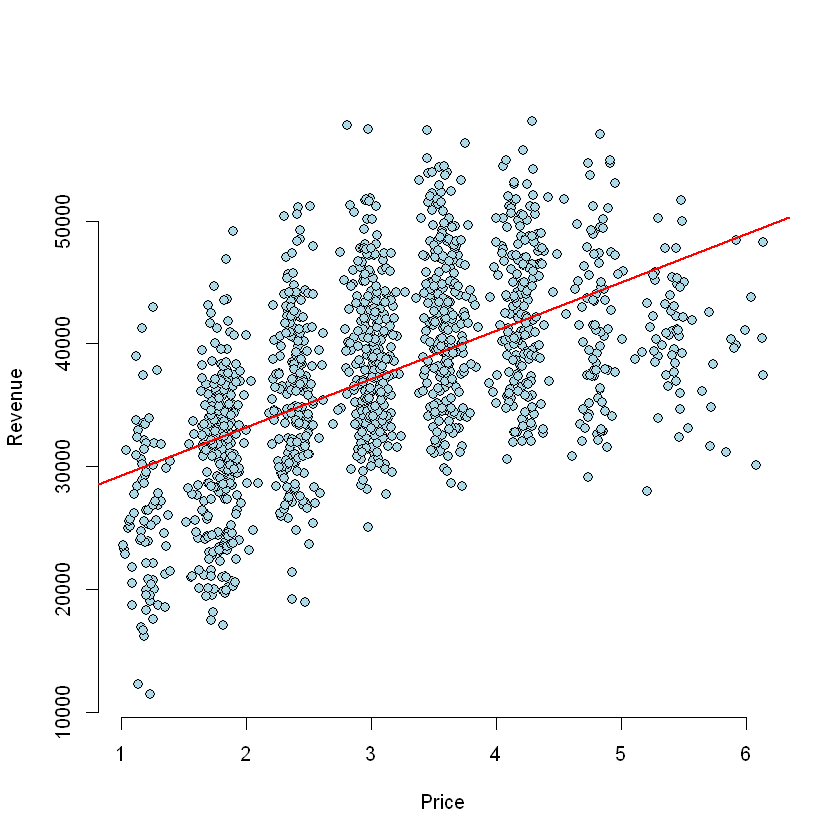

In [12]:
# scatterplot between price (x axis) vs. revenue (y axis).
plot(trainSet$price,trainSet$revenue,
     xlab="Price",
     ylab="Revenue",
     bg="lightblue",
     col="black",cex=1.1,pch=21,frame=FALSE)

# Add Line of Best Fit to the scatterplot
abline(lm(revenue~price,data=trainSet),lwd=2, col="red")

#### Final Conclusions<br>

Ok, so we know what our model looks like based off the training set, but is it any good? well, not really.<br>

The output of our model states that while the significance of price is high (<i>***</i>), our R-squared value is only 0.3157 and our Residiual Standard Error (RSE) is 6495. This means that our model is only able to explain 31.57% of the increase in revenue with an average-predicted-distance error of 6495 from the original (real) points. And this is was on the training set alone. <br>

Whenever we get a not-great model for our data in the training stage, there's no point in trying it on the test set seeing that it will provide results of the same (if not worse) value.<br>

Luckily, we have plenty more features to help of improve our model! So now we're going to utilize Multiple Linear Regression (MLR). 

### Multiple Linear Regression (MLR)<br>

MLR is very similar to SLR, except now we can use more than one feature in order to predict our dependant variable (revenue).<br>

So now, instead of having Y=mX+b, we get <i>Y = b + m1&#8727;feature1 + m2&#8727;feature2...</i> and so on.<br>

Let's try it out. We saw earlier that the feature size_beverage was also rather highly corelated to revenue, so we'll add that into our model.<br>

In [13]:
# Fitting our data into the SLR model.
fit1 = lm(revenue~price+size_beverage, data=trainSet)
# Retrieving the coefficiency of our model.
coef(fit1)
# Description of our model.
summary(fit1)

(Intercept)         price size_beverage 
   25209.0055     -554.6629    27128.3642


Call:
lm(formula = revenue ~ price + size_beverage, data = trainSet)

Residuals:
     Min       1Q   Median       3Q      Max 
-18879.6  -4621.3   -119.1   4526.7  20533.2 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    25209.0      509.7  49.456   <2e-16 ***
price           -554.7     1757.7  -0.316   0.7524    
size_beverage  27128.4    10597.3   2.560   0.0106 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6482 on 1392 degrees of freedom
Multiple R-squared:  0.3189,	Adjusted R-squared:  0.3179 
F-statistic: 325.9 on 2 and 1392 DF,  p-value: < 2.2e-16


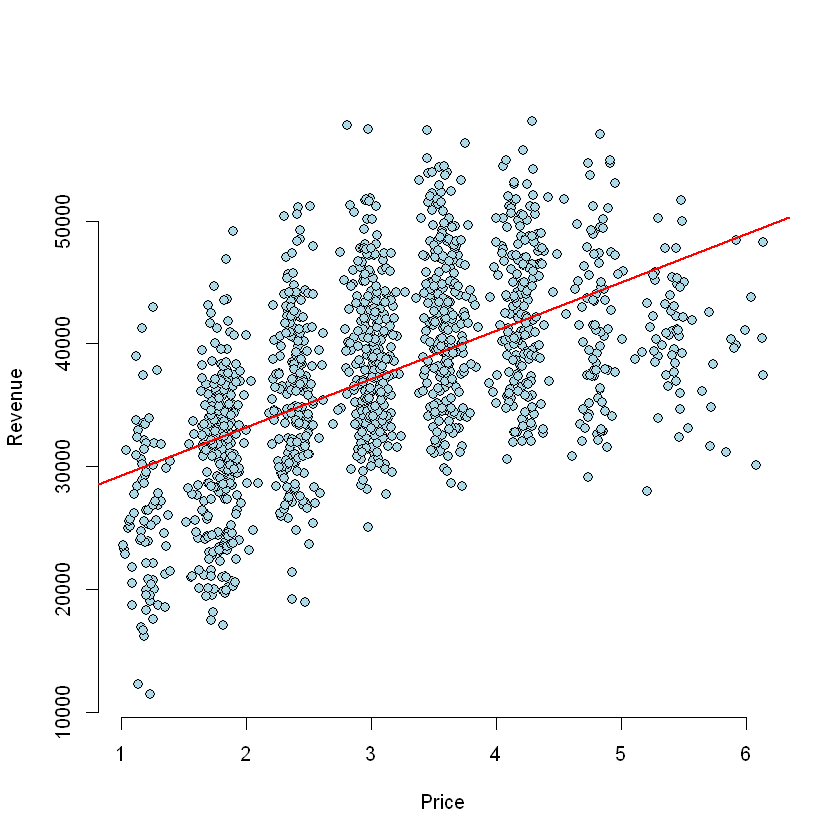

In [14]:
# ploting the model.
plot(trainSet$price,trainSet$revenue,
     xlab="Price",
     ylab="Revenue",
     bg="lightblue",
     col="black",cex=1.1,pch=21,frame=FALSE)

# Add Line of Best Fit to the scatterplot.
abline(lm(revenue~price,data=trainSet),lwd=2, col="red")

Looking at our new MLR model, we get a somewaht weird result. If you noticed, unlike in our SLR model, suddenly the price feature became insignificant with a negative slope. Alas, the models result is pretty much the same. R-squared $ RSE seem to be almost of same value as before. What does this mean?<br>

##### Multicollinearity<br>

If you scroll back up you'll see in our piarplot(scatterplot matrix) that the features size_beverage and price are very strongly corelated. In fact they are 0.996037417630387 corelated ( cor(myData.price, myData.size_beverage) ).<br>

That means they're so close together that the model has a hard time determining which one of them is giving a greater impact on revenue. More over, this shows you that "too many cooks can ruin a dish". This is why you always want to look at all aspects of your data.

You can read more on the subject at <a href="http://blog.minitab.com/blog/understanding-statistics/handling-multicollinearity-in-regression-analysis">Minitab: Handling Multicollinearity in Regression Analysis</a><br>

Let's try out two new models of MLR containing the rest of our features, but in one we'll exclude the price feature and in the other we'll exclude the size_beverage feature.

In [15]:
fit2 = lm(revenue~price+salad+ice_cream+toy, data=trainSet)
# Retrieving the coefficiency of our model.
coef(fit2)
# Description of our model.
summary(fit2)

(Intercept)       price       salad   ice_cream         toy 
  25547.535    4136.087   -7645.645    3923.918    6179.084


Call:
lm(formula = revenue ~ price + salad + ice_cream + toy, data = trainSet)

Residuals:
   Min     1Q Median     3Q    Max 
-12958  -2436    122   2614  12569 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25547.54     335.03   76.25   <2e-16 ***
price        4136.09      93.09   44.43   <2e-16 ***
salad       -7645.64     209.24  -36.54   <2e-16 ***
ice_cream    3923.92     276.54   14.19   <2e-16 ***
toy          6179.08     214.54   28.80   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3897 on 1390 degrees of freedom
Multiple R-squared:  0.7541,	Adjusted R-squared:  0.7534 
F-statistic:  1066 on 4 and 1390 DF,  p-value: < 2.2e-16


Ok, so far we get much better results! R-squared is 0.7541, meaning our model was able to explain correctly 75.41% of the depandent variable revenue, and a lower RSE of 3897.<br>

So looking at our equation now, it is as follows: <i><b>revenue</b> = 25547.53521 + 4136.08742&#8727;<b>price</b> - 7645.64474&#8727;<b>salad</b> + 3923.9178&#8727;<b>ice_cream</b> + 6179.08445&#8727;<b>toy</b></i> <br>
Meaning that where a boolian feature is present in a data point, it's estimator will add to revenue, and the opposite will occur when it's not present in the data point.<br>

for example: A meal with a price of 4.5 that comes with a toy and without ice_cream and salad would yield <i><b>revenue</b> = 25547.53521 + 4136.08742&#8727;<b>4.5</b> + 6179.08445&#8727;<b>1</b> - 7645.64474&#8727;<b>0</b> + 3923.9178&#8727;<b>0</b> = 50339.01305</i><br>


Let's see how the second model holds up.

In [16]:
fit3 = lm(revenue~size_beverage+salad+ice_cream+toy, data=trainSet)
# Retrieving the coefficiency of our model.
coef(fit3)
# Description of our model.
summary(fit3)

(Intercept) size_beverage         salad     ice_cream           toy 
    25429.106     25039.464     -7641.645      3902.254      6189.408


Call:
lm(formula = revenue ~ size_beverage + salad + ice_cream + toy, 
    data = trainSet)

Residuals:
     Min       1Q   Median       3Q      Max 
-12852.6  -2483.6    180.4   2651.2  13048.4 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    25429.1      334.3   76.08   <2e-16 ***
size_beverage  25039.5      557.8   44.89   <2e-16 ***
salad          -7641.6      208.0  -36.74   <2e-16 ***
ice_cream       3902.3      274.9   14.20   <2e-16 ***
toy             6189.4      213.3   29.02   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3874 on 1390 degrees of freedom
Multiple R-squared:  0.7571,	Adjusted R-squared:  0.7564 
F-statistic:  1083 on 4 and 1390 DF,  p-value: < 2.2e-16


We seem to have slightly better results in this model then in our previous model.<br>

In [17]:
install.packages('caret', repos='http://cran.us.r-project.org')
library(caret)
varImp(fit2, scale = FALSE)
varImp(fit3, scale = FALSE)

package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\net70\AppData\Local\Temp\RtmpCiogl7\downloaded_packages


Warning message:
"package 'caret' was built under R version 3.3.3"Loading required package: lattice
Loading required package: ggplot2


,Overall
price,44.43070
salad,36.54092
ice_cream,14.18942
toy,28.80099


,Overall
size_beverage,44.88625
salad,36.74300
ice_cream,14.19667
toy,29.02282


We can se that our most important independant variables are price, size_beverage and salad. Not surprising kids!<br><br>

We're almost done, just need to dig a little bit deeper. We'll do said digging via the Root Mean Squared Error (RMSE).<br>

#### Root Mean Squared Error (RMSE)<br>

The square root of the mean/average of the square of all of the error. In simplicity, it indicates on avarage how far each real data point is from the prediction line (how far off we are).<br>
We want the model that has the smallest RMSE and highest R-squared. So we'll find out via the testSet. 


In [18]:
# Adding the predictions of each model to the testSet.
testSet$fit1_pred = predict(fit1, newdata=testSet)
testSet$fit2_pred = predict(fit2, newdata=testSet)
testSet$fit3_pred = predict(fit3, newdata=testSet)
head(testSet)

,price,size_beverage,salad,ice_cream,toy,revenue,fit1_pred,fit2_pred,fit3_pred
1,3.546357,0.6,1,0,1,34957.86,39518.99,38749.02,39000.55
7,2.409824,0.4,1,1,0,31747.60,34723.71,31793.05,31705.50
8,2.988093,0.5,1,0,0,36463.00,37115.80,30260.90,30307.19
13,3.164706,0.5,1,0,0,33908.54,37017.84,30991.39,30307.19
15,4.688194,0.8,1,0,0,33414.33,44311.33,37292.67,37819.03
17,2.276852,0.4,1,0,1,33978.96,34797.47,33498.23,33992.65


In [19]:
# Calculating the RMSE of eaech model.
RMSE1 = sqrt(mean((testSet$revenue-testSet$fit1_pred)**2))
RMSE2 = sqrt(mean((testSet$revenue-testSet$fit2_pred)**2))
RMSE3 = sqrt(mean((testSet$revenue-testSet$fit3_pred)**2))

RMSE1
RMSE2
RMSE3

[1] 6243.384

[1] 3945.727

[1] 3930.253

Seems we have a winner!<br>

with an RMSE = 3930 and a R-squared = 0.7571, fit3 takes the cake despite being only slightly better than fit2.